In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Convex Optimizations


In [4]:
from scipy.optimize import minimize

In [17]:
def f(x):
    return (x-3)**4
res = minimize(f,4)


In [18]:
res.x

array([2.99])

Minimize $$f(x,y) = (x-1)^2 + (y-2.5)^2$$
Subject to: 
   $$x-2y +2 \geq 0$$
   $$-x-2y +6 \geq 0$$
   $$x-2y \geq 0$$
   $$-x+2y+2 \geq 0$$
   $$x \geq 0$$
   $$y\geq 0$$

In [22]:
f = lambda x : (x[0]-1)**2 + (x[1]-2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
res = minimize(f, (2, 0), bounds=bnds, constraints=cons)

In [25]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

# Calculating Frequency for Spring Motion
$$y(t) = A\cos{\omega t}$$

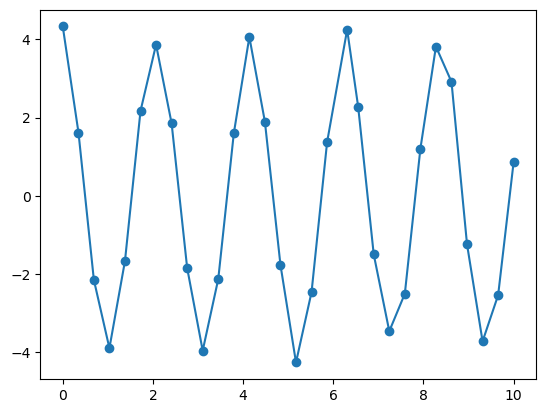

In [30]:
t_data = np.array([ 0.   ,  0.34882759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86216897,  6.30689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20122052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])
plt.plot(t_data,y_data,'-o')

In [35]:
#looks similar to a cosine wave
#T~2 sec thus w~pi
def f(x,A,w,phi):
    return A*np.cos(w*x + phi)
popt , pcov = sp.optimize.curve_fit(f,t_data,y_data,p0=(4,np.pi,0))
popt

array([3.95059456, 2.99912615, 0.10106278])

# Air Friction ODE solution

In [36]:
from scipy.integrate import odeint

$\frac{dv}{dt} - \alpha v^2 + \beta = 0$

In [38]:
def fp(v,t):
    return 3*v**2 - 5

In [43]:
t = np.linspace(0,1,100)
sol = odeint(fp,0,t)
sol.T

array([[ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
        -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
        -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
        -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
        -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
        -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
        -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
        -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
        -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
        -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
        -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
        -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
        -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
        -1.27512464, -1.2763122 , -1.27741137, -1.2

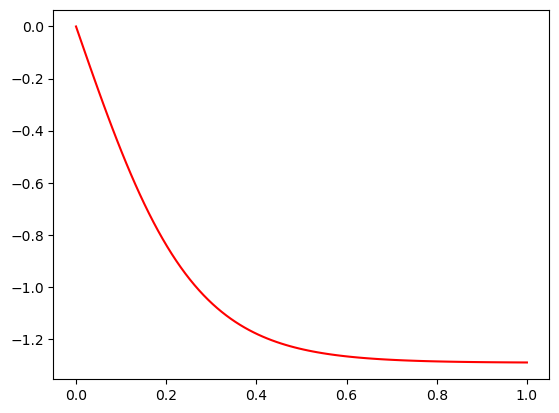

In [46]:
plt.plot(t,sol.T[0],color='red')

# Coupled first order ODE's -> Second degree ODE's

$$\frac{dy1}{dt} = y1 + 4*y1^2 - t    $$
$$\frac{dy2}{dt} = y2 + y2^2 - \cos{t}    $$

Let S= (y1,y2)
we can now solve for dS/dt

In [47]:
def dSdt(S,t):
    y1 , y2 = S
    return [y1 + 4*y1**2 - t , y2+ y2**2 - np.cos(t)]

In [48]:
t = np.linspace(0,2,150)

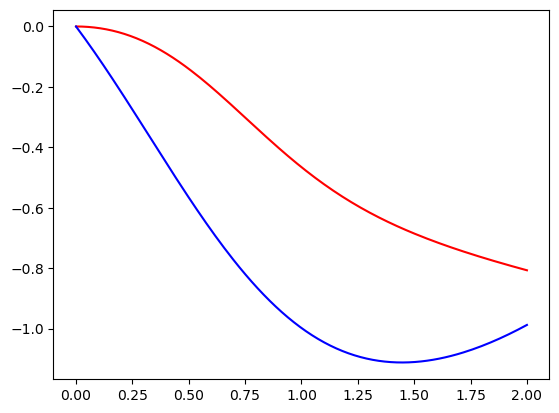

In [49]:
sol = odeint(dSdt,(0,0),t)
plt.plot(t,sol.T[0],color='red')
plt.plot(t,sol.T[1],color='blue')

# Solving SHM
$$\frac{d^2\theta}{dt^2} = \sin(\theta)$$